In [84]:
# Cargamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [85]:
# Insertamos esta línea de código para que los números aparezcan separados por comas

pd.options.display.float_format = "{:,.2f}".format

In [86]:
# Importamos el Data Set

carros = pd.read_csv("../archivos_CSV/Evaluacion_Carros.csv", header = None)

In [87]:
# Verificamos que se carguen bien los datos y su dimensión

print(carros.shape)
carros.head()

(1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [88]:
# Ponemos los encabezados del data Frame

nombre_columnas = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
carros.columns = nombre_columnas

In [89]:
# Observamos los tipos de datos del data frame

carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [90]:
# Convertimos los valores de objeto a numéricos

import category_encoders as ce

In [91]:
# Convertimos los valores de objeto a numéricos

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
carros = encoder.fit_transform(carros)

In [92]:
# Exportamos el data set con las variables convertidas en numéricas

carros.to_csv("../archivos_CSV/carros_transformados.csv", encoding = "utf-8", index = False)

In [93]:
# Observamos la variable objetivo, la cual es Class, y nos dice la calidad del auto. 
# Hacemos un count value para ver como se divide

carros["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

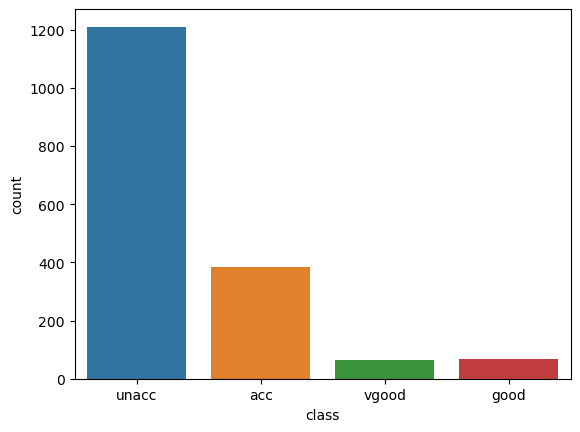

In [94]:
# Vemos graficamente la distribución de la clase a clasificar

sns.countplot(data = carros, x = "class")
plt.show()